In [1]:
import cv2
import netCDF4
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
def read_nc_file(file):
    data = netCDF4.Dataset(file)
    data = data['sst4'][:]
    data = np.array(data)
    return data 

In [3]:
def prepere_nc(file):
    data = read_nc_file(file)
    data = data[... , np.newaxis]
    data = data.repeat(3, axis=-1)
    data = cv2.resize(data , (512, 512))[None]
    return data

In [4]:
def plot_nc_file(file, ax):
    nc_obj = netCDF4.Dataset(file)
    data = nc_obj['sst4'][:]
    min_val , max_val = nc_obj.data_minimum , nc_obj.data_maximum
    new_cmap = colors.ListedColormap(["#93006C","#6F0090","#4800B7","#2100DE","#000AFF","#004AFF","#0090FF","#00D5FF","#00FFD7","#00FF77","#00FF0F","#60FF00","#C8FF00","#FFEB00","#FFB700","#FF8300","#FF4F00","#FF1F00","#E60000","#A50000","#690000"])
    norm= colors.Normalize(vmin=min_val-2, vmax=max_val)
    latitudes = nc_obj.variables['lat'][:]
    longitudes = nc_obj.variables['lon'][:]
    data = cv2.resize(data, (512 , 512))
    ax.imshow(data, cmap=new_cmap,norm=norm)
    ax.set_xticks(list(range(0, 500 , 500//20)), [*map(str, list(np.linspace(min(longitudes) , max(longitudes),20).round()))],rotation = 90)
    ax.set_yticks(list(range(0 , 500 , 500//20)), [*map(str, list(np.linspace(min(latitudes) , max(latitudes),20).round()))])
    ax.grid(True)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    

In [5]:
model = tf.keras.models.load_model("modelv4.h5")

In [6]:
model.summary()

Model: "ResNet50_U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                     

In [18]:
def plot_mask(file):
    img = prepere_nc(file)
    mask = model.predict(img)[0]
    mask = np.where(mask >=0.5 , 0 , 1)
    #mask[:50 ,:-5] = 1
    fig, (ax1 , ax2 , ax3) = plt.subplots(nrows=1 , ncols=3, figsize=(25 , 7))
    plot_nc_file(file, ax1)
    
    ax2.imshow(mask , cmap="binary")
   
    plot_nc_file(file, ax3)
    ax3.imshow(mask , alpha=0.6, cmap="binary")

In [8]:
plt.savefig?

Signature: plt.savefig(*args, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, *, dpi='figure', format=None, metadata=None,
          bbox_inches=None, pad_inches=0.1,
          facecolor='auto', edgecolor='auto',
          backend=None, **kwargs
         )

The available output formats depend on the backend being used.

Parameters
----------
fname : str or path-like or binary file-like
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is set, it determines the output format, and the file
    is saved as *fname*.  Note that *fname* is used verbatim, and there
    is no attempt to make the extension, if any, of *fname* match
    *format*, and no extension is appended.

    If *format* is not set, then the format is inferred from the
    extension of *fname*, if there is one.  If *format* is not
    set and *fname* has no extension, then the file

1/1 [==============================] - 2s 2s/step


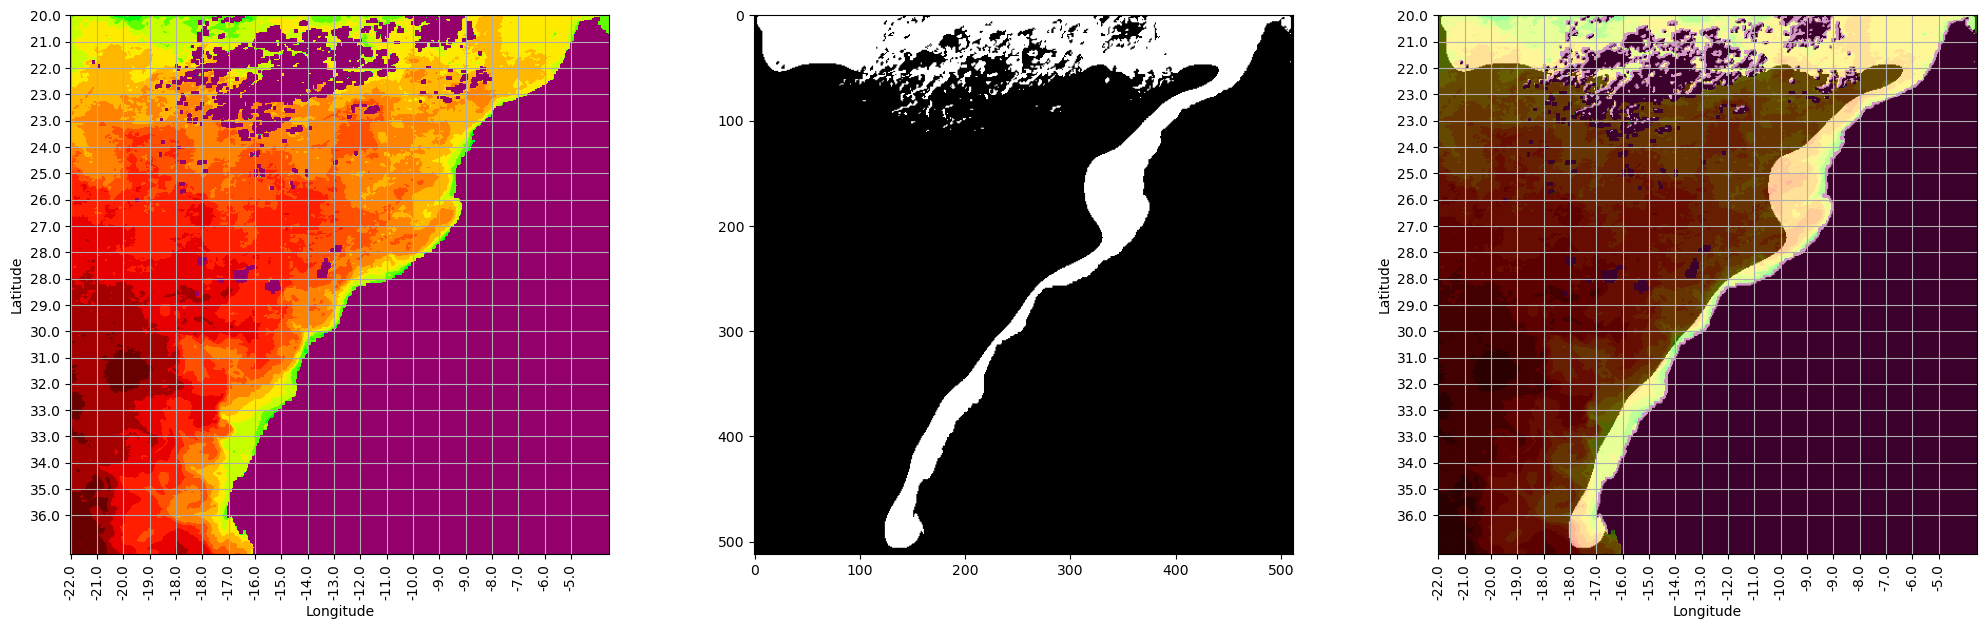

In [19]:
import warnings
warnings.filterwarnings("ignore")
your_nc_file = "data/data/images/AQUA_MODIS.20230109_20230116.L3m.8D.SST4.x_sst4.nc"
plot_mask(your_nc_file)

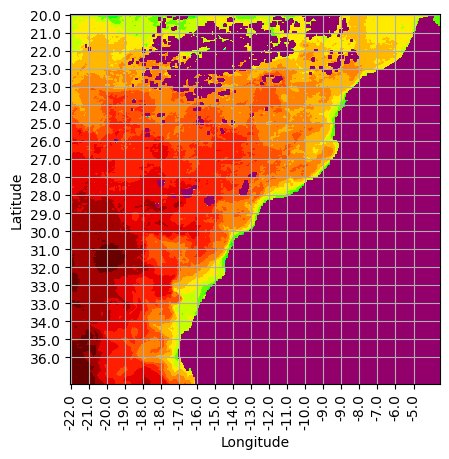

In [16]:
fig, ax = plt.subplots()
plot_nc_file(your_nc_file, ax)
fig.savefig("image.png",  pad_inches=0 , facecolor = "none", bbox_inches="tight")
#ax1.figure.savefig("image.png", pad_inches=0 , facecolor = "none", bbox_inches="tight")

1/1 [==============================] - 2s 2s/step


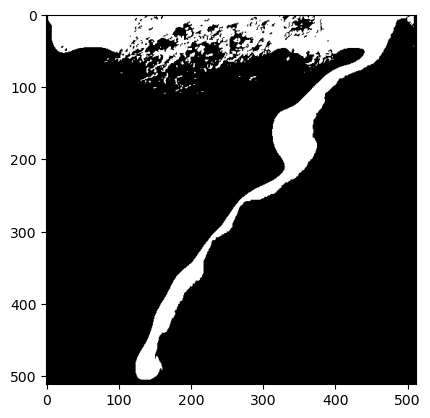

In [20]:
fig, ax = plt.subplots()
img = prepere_nc(your_nc_file)
mask = model.predict(img)[0]
mask = np.where(mask >=0.5 , 0 , 1)
#mask[:50 ,:-5] = 1
ax.imshow(mask , cmap= "binary")

fig.savefig("mask.png", pad_inches=0 , facecolor = "none", bbox_inches="tight")